# Using JSON COCO Folders

In [ ]:
import json

# Replace 'path_to_file.json' with the path to your JSON file
with open('/content/drive/MyDrive/Thesis/coco_test_data.json', 'r') as file:
    data = json.load(file)

# Now 'data' is a Python dictionary containing the JSON data
print(data.keys())


dict_keys(['images', 'annotations', 'categories'])


In [ ]:
data["images"][:5]

[{'height': 517, 'width': 658, 'id': 1, 'file_name': 'L1Ap5_1-1-18.png'},
 {'height': 517, 'width': 658, 'id': 2, 'file_name': 'L1Ap5_10-1-10.png'},
 {'height': 517, 'width': 658, 'id': 3, 'file_name': 'L1Ap5_10-1-297.png'},
 {'height': 517, 'width': 658, 'id': 4, 'file_name': 'L1Ap5_10-1-73.png'},
 {'height': 517, 'width': 658, 'id': 5, 'file_name': 'L1Ap5_11-1-143.png'}]

In [ ]:
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to your COCO formatted JSON file
annotation_file = '/content/drive/MyDrive/Thesis/coco_test_data.json'
coco = COCO(annotation_file)


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


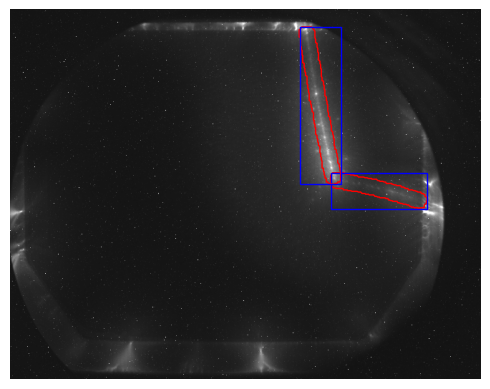

In [ ]:
import numpy as np
from matplotlib.patches import Polygon, Rectangle

def visualize_image(image_id):
    # Load the image
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join('/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Test', image_info['file_name'])
    image = Image.open(image_path)

    # Load and plot the annotations
    plt.imshow(image)
    ax = plt.gca()

    ann_ids = coco.getAnnIds(imgIds=image_info['id'], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        # Draw segmentation
        if 'segmentation' in ann:
            poly = ann['segmentation'][0]
            poly = np.array(poly).reshape((int(len(poly)/2), 2))
            poly_patch = Polygon(poly, facecolor='none', edgecolor='red')
            ax.add_patch(poly_patch)

        # Draw bounding box
        if 'bbox' in ann:
            bbox = ann['bbox']
            rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='blue', facecolor='none')
            ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Replace with your image ID
visualize_image(9)

# Using the created dataframe

In [1]:
import pandas as pd

df_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/annotations.csv"
annotations_df = pd.read_csv(df_path).drop(columns = ["Unnamed: 0"])
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder,bbox_x,bbox_y,bbox_width,bbox_height,segmentation
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train,209.48,254.64,217.19,239.21,"[217.19, 27.01, 215.91, 28.29, 214.62, 29.58, ..."
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train,327.71,237.92,93.82,43.73,"[399.68, 239.21, 398.4, 240.5, 397.11, 240.5, ..."
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val,427.96,218.63,151.65,48.87,"[435.67, 253.36, 434.38, 254.64, 433.1, 254.64..."
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val,116.95,279.08,214.62,124.75,"[127.23, 117.03, 125.95, 118.32, 124.66, 118.3..."
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val,332.86,210.92,46.27,66.88,"[355.99, 243.07, 354.7, 244.35, 354.7, 245.64,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train,478.08,239.21,83.54,203.20,"[485.79, 78.45, 484.5, 79.74, 483.22, 79.74, 4..."
2993,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train,388.12,195.48,167.07,65.59,"[535.91, 259.79, 534.62, 261.07, 533.34, 261.0..."
2994,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train,161.93,232.78,370.12,59.16,"[224.9, 228.92, 223.62, 230.21, 222.33, 230.21..."
2995,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train,89.96,254.64,83.54,32.15,"[122.09, 234.06, 120.8, 235.35, 119.52, 235.35..."


In [2]:
def correct_segmentations(seg):
  corrected_seg = []
  for i in seg[1:-1].split(","):
    corrected_seg.append(float(i))
  return corrected_seg

In [3]:
annotations_df.isna().sum()

id              0
name            0
track           0
z_order         0
p1_x            0
p1_y            0
p2_x            0
p2_y            0
p3_x            0
p3_y            0
folder          0
bbox_x          0
bbox_y          0
bbox_width      0
bbox_height     0
segmentation    0
dtype: int64

we have 3 tracks
Image shape: (517, 658, 4)


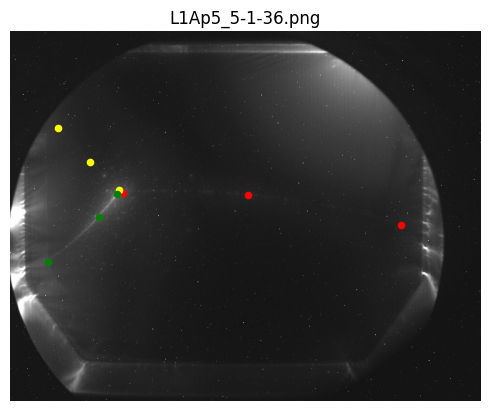

In [4]:
import random
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import numpy as np

data_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"

def view_random_image_labels(target_dir, target_folder, labels_df):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_folder

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  title = random_image[0]

  points = labels_df.loc[labels_df.name == title, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
  colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  for j in range(points.shape[0]):
    plt.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s = 20)
  print(f"we have {j + 1} tracks")
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


img = view_random_image_labels(target_dir = data_path,
                        target_folder="/Train",
                        labels_df = annotations_df)

In [7]:
gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"

def plot_img_points_bbox_segcontour(gt_path, labels_df):
  idx = random.randint(0, labels_df.shape[0])
  img_path = os.path.join(gt_path, labels_df.folder[idx], labels_df.name[idx])
  title = labels_df.name[idx]
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = "gray")
  colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]


  image_name = labels_df.name[idx]
  view = labels_df.name == image_name


  points = labels_df.loc[view, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
  bbox = labels_df.loc[view, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]].values.copy()
  segmentation = labels_df.loc[view, "segmentation"].map(lambda x: correct_segmentations(x)).values.copy()

  for j in range(points.shape[0]):
    plt.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s = 20)
    # plt.scatter(np.array([points[0], points[2], points[4]]), np.array([points[1], points[3], points[5]]), color= "red", s = 2)


    bbox_x = np.array([bbox[j][0], bbox[j][0] + bbox[j][2], bbox[j][0] + bbox[j][2], bbox[j][0], bbox[j][0]])
    bbox_y = np.array([img.shape[0] - bbox[j][1], img.shape[0] - bbox[j][1],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]])
    # bbox_x = np.array([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]])
    # bbox_y = np.array([img.shape[0] - bbox[1], img.shape[0] - bbox[1],
    #                  img.shape[0] - bbox[1]-bbox[3],
    #                  img.shape[0] - bbox[1]-bbox[3],
    #                  img.shape[0] - bbox[1]])
    plt.plot(bbox_x, bbox_y, color = colors[j], linewidth = 0.2)


    x_segmentation = np.array(segmentation[j][::2])
    y_segmentation = np.array(segmentation[j][1::2])
    plt.plot(x_segmentation, y_segmentation, color = colors[j], linewidth = 0.5)


  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (517, 658, 4)


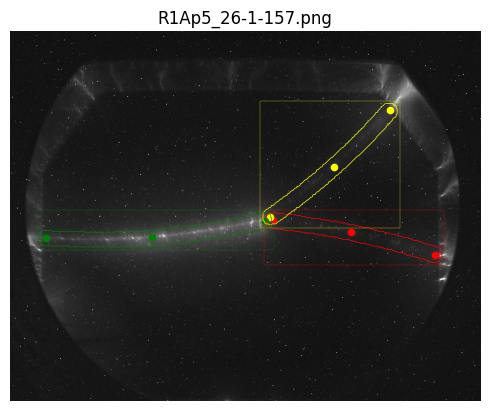

In [8]:
img = plot_img_points_bbox_segcontour(gt_path = gt_path, labels_df = annotations_df)